In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("data\SolarPrediction.csv")
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

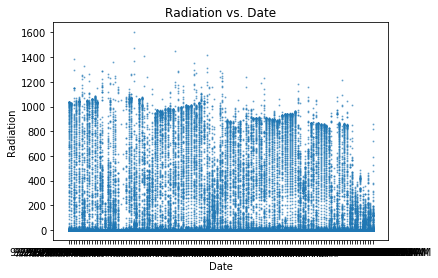

In [42]:
date = df["Data"]
radiation = df["Radiation"]

plt.scatter(date, radiation, s=1, alpha=0.5)
plt.title('Radiation vs. Date')
plt.xlabel('Date')
plt.ylabel('Radiation')
plt.show()

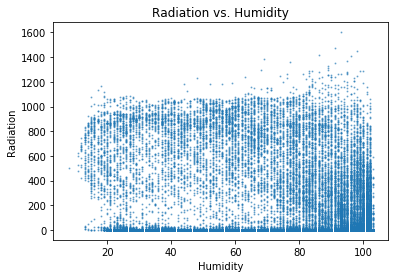

In [38]:
humidity = df["Humidity"]
radiation = df["Radiation"]

plt.scatter(humidity, radiation, s=1, alpha=0.5)
plt.title('Radiation vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Radiation')
plt.show()

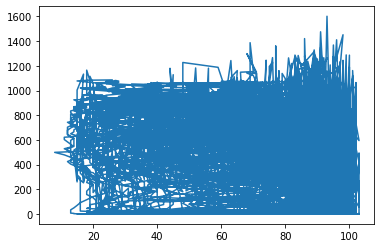

In [41]:
plt.plot(humidity,radiation)